# Import dependencies

In [42]:
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
from pandas_profiling import ProfileReport

# Load the dataset

In [3]:
import pandas as pd
# Import the data
df_daily = pd.read_csv("C:\\Users\\User\\Desktop\\Ryerson\\CIND 820\\Dataset\\salesdaily.csv")
df_daily.drop(['Year','Month','Hour','Weekday Name'], axis=1, inplace=True)
df_daily['datum'] = pd.to_datetime(df_daily['datum'])
df_daily.rename(columns = {'datum':'Date'}, inplace = True)
# Set the date as index 
df_daily = df_daily.set_index('Date')
df_daily.head()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
Date,,,,,,,,
2014-01-02,0.0,3.67,3.4,32.40,7.0,0.0,0.0,2.0
2014-01-03,8.0,4.00,4.4,50.60,16.0,0.0,20.0,4.0
2014-01-04,2.0,1.00,6.5,61.85,10.0,0.0,9.0,1.0
2014-01-05,4.0,3.00,7.0,41.10,8.0,0.0,3.0,0.0
2014-01-06,5.0,1.00,4.5,21.70,16.0,2.0,6.0,2.0


# Profile report

In [5]:
profile = ProfileReport(df_daily,title='Pandas Profiling Report',explorative=True)

In [7]:
profile.to_widgets()

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

# Visualizing the data

### Daily plot

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

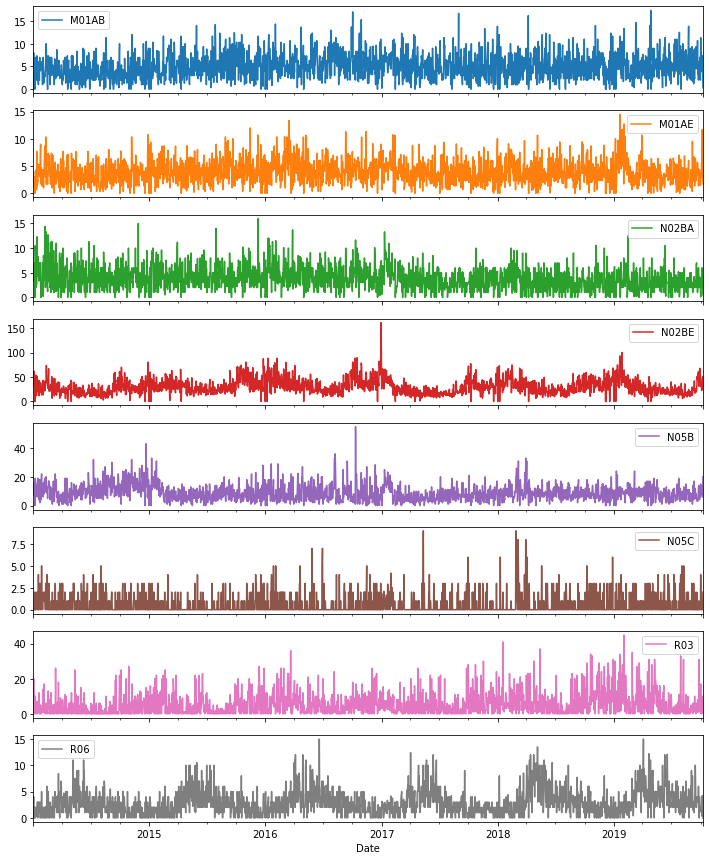

In [11]:
%matplotlib inline
df_daily.plot(subplots=True,figsize=(12,15))

### Monthly plot

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

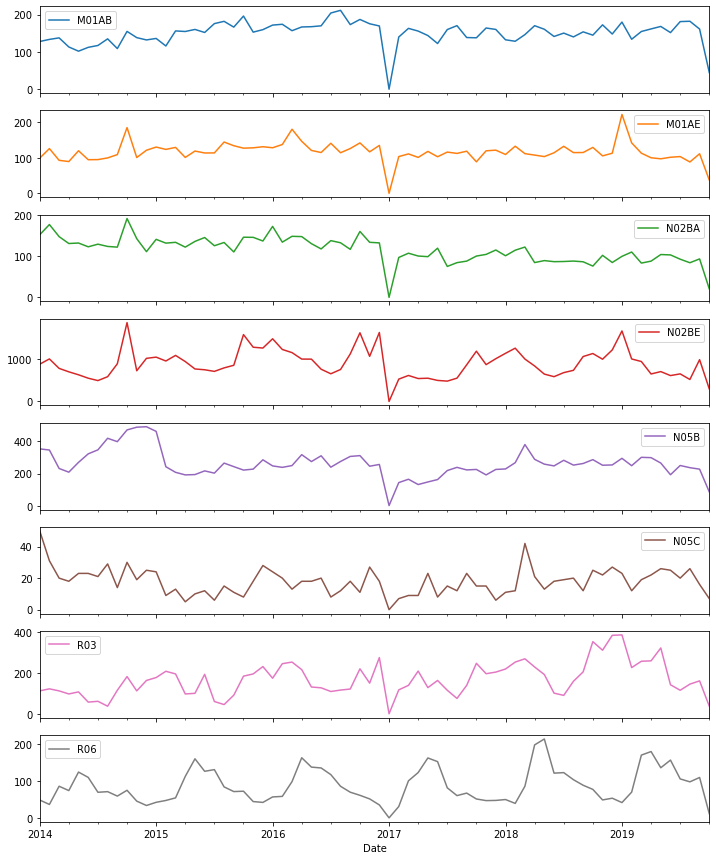

In [37]:
# Import the data
df_monthly = pd.read_csv("C:\\Users\\User\\Desktop\\Ryerson\\CIND 820\\Dataset\\salesmonthly.csv")
df_monthly['datum'] = pd.to_datetime(df_monthly['datum'])
df_monthly.rename(columns = {'datum':'Date'}, inplace = True)
# Set the date as index 
df_monthly = df_monthly.set_index('Date')
df_monthly.plot(subplots=True, figsize=(12, 15))

# Checking seasonality

In [21]:
# Import Data
df_monthly = pd.read_csv("C:\\Users\\User\\Desktop\\Ryerson\\CIND 820\\Dataset\\salesmonthly.csv", parse_dates=['datum'], index_col='datum')
df_monthly.reset_index(inplace=True)
df_monthly.rename(columns = {'datum':'Date'}, inplace = True)

# Prepare data
df_monthly['year'] = [d.year for d in df_monthly.Date]
df_monthly['month'] = [d.strftime('%b') for d in df_monthly.Date]
years = df_monthly['year'].unique()

### Box plot of M01AB

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


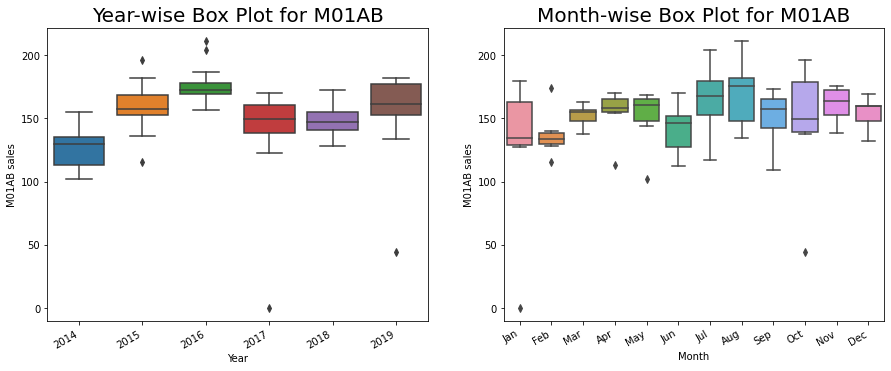

In [22]:
# Splitting the plot into (1,2) subplotsand initializing them using fig and ax variables
fig, ax = plt.subplots(nrows=1, ncols=2,
                       figsize=(15, 6))
 
# Using Seaborn Library for Box Plot
sns.boxplot(df_monthly['year'],
            df_monthly["M01AB"], ax=ax[0])
 
# Defining the title and axes names
ax[0].set_title('Year-wise Box Plot for M01AB',
                fontsize=20, loc='center')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('M01AB sales')
 
# Using Seaborn Library for Box Plot
sns.boxplot(df_monthly['month'],
            df_monthly["M01AB"], ax=ax[1])
 
# Defining the title and axes names
ax[1].set_title('Month-wise Box Plot for M01AB',
                fontsize=20, loc='center')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('M01AB sales')
 
# rotate the ticks and right align them
fig.autofmt_xdate()

### Box plot of M01AE

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


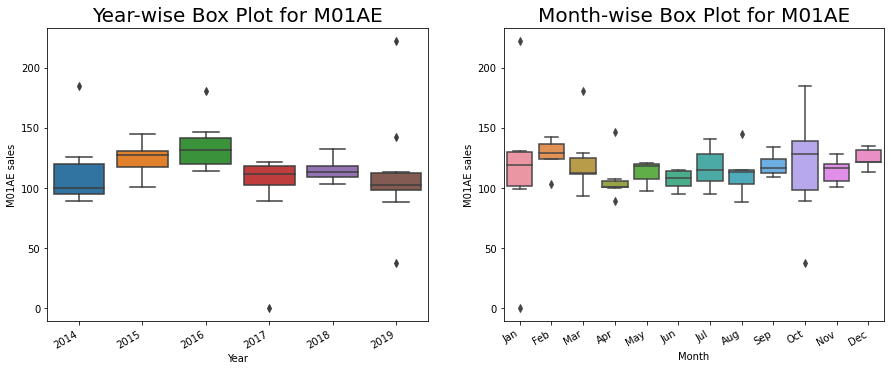

In [23]:
# Splitting the plot into (1,2) subplots
# and initializing them using fig and ax
# variables
fig, ax = plt.subplots(nrows=1, ncols=2,
                       figsize=(15, 6))
 
# Using Seaborn Library for Box Plot
sns.boxplot(df_monthly['year'],
            df_monthly["M01AE"], ax=ax[0])
 
# Defining the title and axes names
ax[0].set_title('Year-wise Box Plot for M01AE',
                fontsize=20, loc='center')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('M01AE sales')
 
# Using Seaborn Library for Box Plot
sns.boxplot(df_monthly['month'],
            df_monthly["M01AE"], ax=ax[1])
 
# Defining the title and axes names
ax[1].set_title('Month-wise Box Plot for M01AE',
                fontsize=20, loc='center')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('M01AE sales')
 
# rotate the ticks and right align them
fig.autofmt_xdate()

### Box plot of N02BA

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


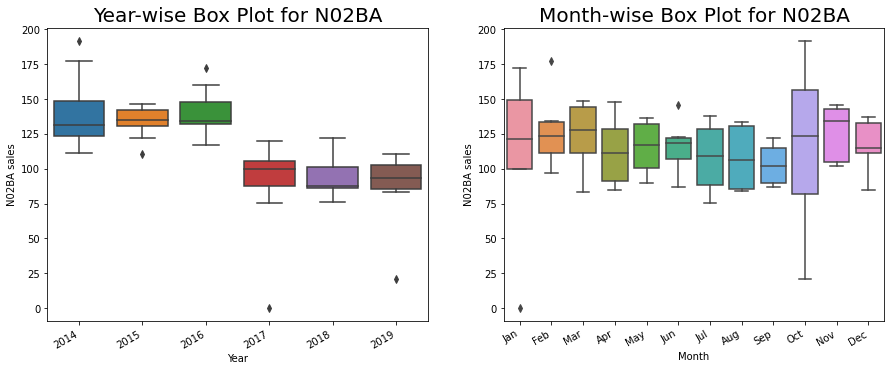

In [24]:
# Splitting the plot into (1,2) subplots
# and initializing them using fig and ax
# variables
fig, ax = plt.subplots(nrows=1, ncols=2,
                       figsize=(15, 6))
 
# Using Seaborn Library for Box Plot
sns.boxplot(df_monthly['year'],
            df_monthly["N02BA"], ax=ax[0])
 
# Defining the title and axes names
ax[0].set_title('Year-wise Box Plot for N02BA',
                fontsize=20, loc='center')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('N02BA sales')
 
# Using Seaborn Library for Box Plot
sns.boxplot(df_monthly['month'],
            df_monthly["N02BA"], ax=ax[1])
 
# Defining the title and axes names
ax[1].set_title('Month-wise Box Plot for N02BA',
                fontsize=20, loc='center')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('N02BA sales')
 
# rotate the ticks and right align them
fig.autofmt_xdate()


### Box plot of N02BE

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


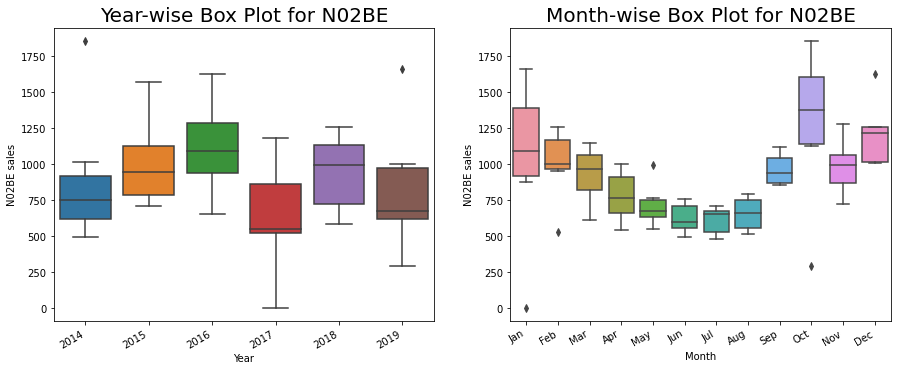

In [25]:
# Splitting the plot into (1,2) subplots
# and initializing them using fig and ax
# variables
fig, ax = plt.subplots(nrows=1, ncols=2,
                       figsize=(15, 6))
 
# Using Seaborn Library for Box Plot
sns.boxplot(df_monthly['year'],
            df_monthly["N02BE"], ax=ax[0])
 
# Defining the title and axes names
ax[0].set_title('Year-wise Box Plot for N02BE',
                fontsize=20, loc='center')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('N02BE sales')
 
# Using Seaborn Library for Box Plot
sns.boxplot(df_monthly['month'],
            df_monthly["N02BE"], ax=ax[1])
 
# Defining the title and axes names
ax[1].set_title('Month-wise Box Plot for N02BE',
                fontsize=20, loc='center')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('N02BE sales')
 
# rotate the ticks and right align them
fig.autofmt_xdate()

### Box plot of N05B

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


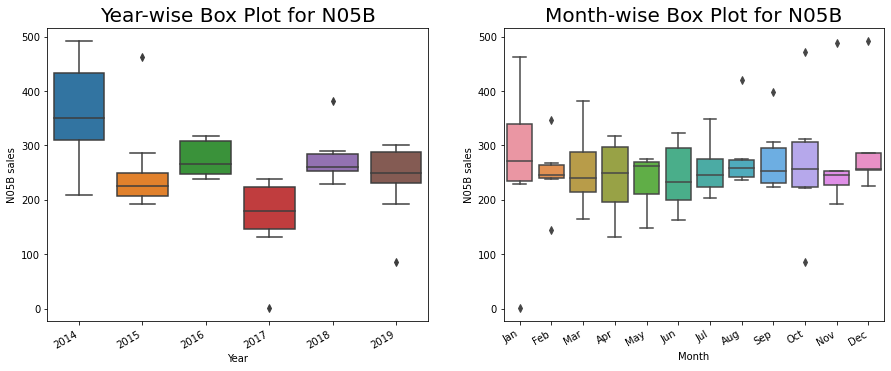

In [26]:
# Splitting the plot into (1,2) subplots
# and initializing them using fig and ax
# variables
fig, ax = plt.subplots(nrows=1, ncols=2,
                       figsize=(15, 6))
 
# Using Seaborn Library for Box Plot
sns.boxplot(df_monthly['year'],
            df_monthly["N05B"], ax=ax[0])
 
# Defining the title and axes names
ax[0].set_title('Year-wise Box Plot for N05B',
                fontsize=20, loc='center')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('N05B sales')
 
# Using Seaborn Library for Box Plot
sns.boxplot(df_monthly['month'],
            df_monthly["N05B"], ax=ax[1])
 
# Defining the title and axes names
ax[1].set_title('Month-wise Box Plot for N05B',
                fontsize=20, loc='center')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('N05B sales')
 
# rotate the ticks and right align them
fig.autofmt_xdate()

### Box plot of N05C

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


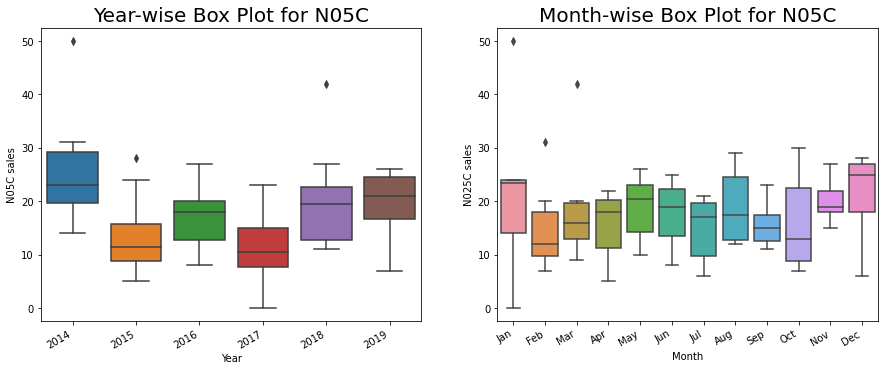

In [27]:
# Splitting the plot into (1,2) subplots
# and initializing them using fig and ax
# variables
fig, ax = plt.subplots(nrows=1, ncols=2,
                       figsize=(15, 6))
 
# Using Seaborn Library for Box Plot
sns.boxplot(df_monthly['year'],
            df_monthly["N05C"], ax=ax[0])
 
# Defining the title and axes names
ax[0].set_title('Year-wise Box Plot for N05C',
                fontsize=20, loc='center')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('N05C sales')
 
# Using Seaborn Library for Box Plot
sns.boxplot(df_monthly['month'],
            df_monthly["N05C"], ax=ax[1])
 
# Defining the title and axes names
ax[1].set_title('Month-wise Box Plot for N05C',
                fontsize=20, loc='center')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('N025C sales')
 
# rotate the ticks and right align them
fig.autofmt_xdate()

### Box plot of R03

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


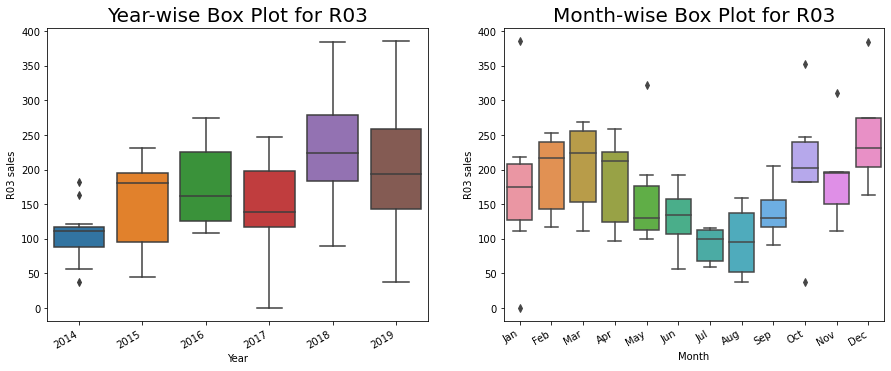

In [28]:
# Splitting the plot into (1,2) subplots
# and initializing them using fig and ax
# variables
fig, ax = plt.subplots(nrows=1, ncols=2,
                       figsize=(15, 6))
 
# Using Seaborn Library for Box Plot
sns.boxplot(df_monthly['year'],
            df_monthly["R03"], ax=ax[0])
 
# Defining the title and axes names
ax[0].set_title('Year-wise Box Plot for R03',
                fontsize=20, loc='center')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('R03 sales')
 
# Using Seaborn Library for Box Plot
sns.boxplot(df_monthly['month'],
            df_monthly["R03"], ax=ax[1])
 
# Defining the title and axes names
ax[1].set_title('Month-wise Box Plot for R03',
                fontsize=20, loc='center')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('R03 sales')
 
# rotate the ticks and right align them
fig.autofmt_xdate()

### Box plot of R06

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


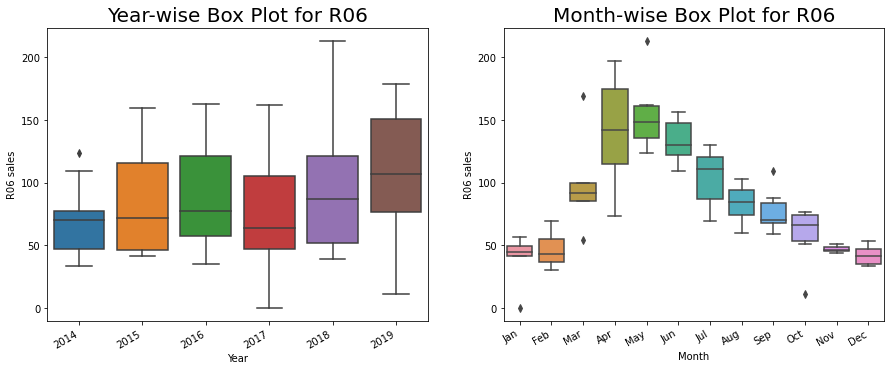

In [29]:
# Splitting the plot into (1,2) subplots
# and initializing them using fig and ax
# variables
fig, ax = plt.subplots(nrows=1, ncols=2,
                       figsize=(15, 6))
 
# Using Seaborn Library for Box Plot
sns.boxplot(df_monthly['year'],
            df_monthly["R06"], ax=ax[0])
 
# Defining the title and axes names
ax[0].set_title('Year-wise Box Plot for R06',
                fontsize=20, loc='center')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('R06 sales')
 
# Using Seaborn Library for Box Plot
sns.boxplot(df_monthly['month'],
            df_monthly["R06"], ax=ax[1])
 
# Defining the title and axes names
ax[1].set_title('Month-wise Box Plot for R06',
                fontsize=20, loc='center')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('R06 sales')
 
# rotate the ticks and right align them
fig.autofmt_xdate()

### Autocorrelation analysis

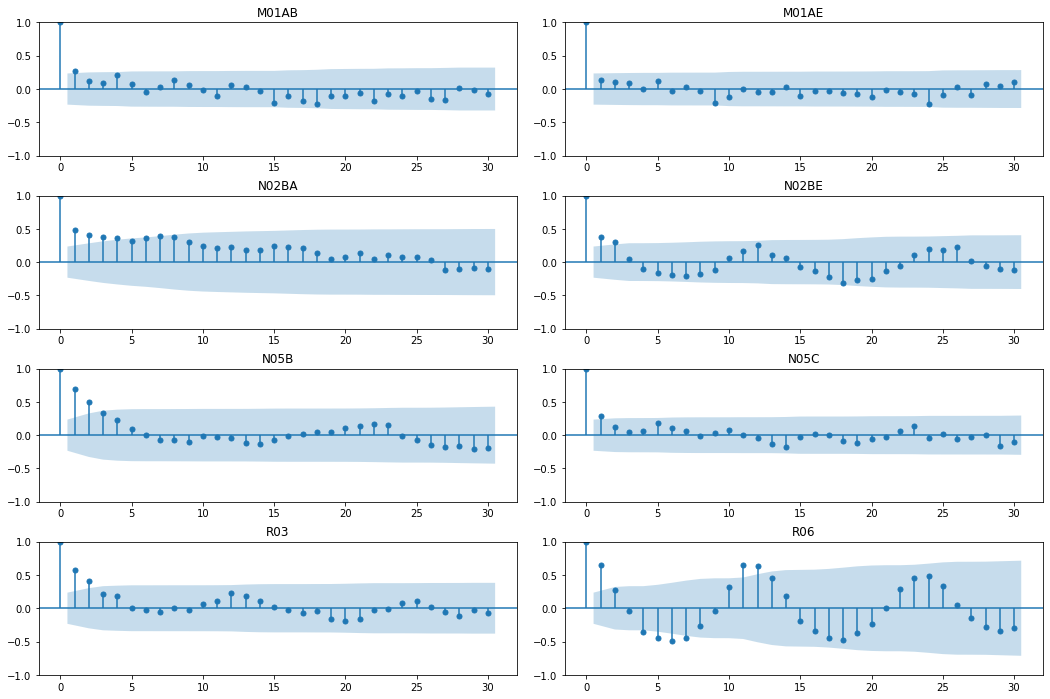

In [45]:
# Import the data
df_daily = pd.read_csv("C:\\Users\\User\\Desktop\\Ryerson\\CIND 820\\Dataset\\salesdaily.csv")
df_daily.drop(['Year','Month','Hour','Weekday Name'], axis=1, inplace=True)
df_daily['datum'] = pd.to_datetime(df_daily['datum'])
df_daily.rename(columns = {'datum':'Date'}, inplace = True)
# Set the date as index 
df_daily = df_daily.set_index('Date')

# plot correlogram for all the products
subplotindex=0
numrows=4
numcols=2
fig, ax = plt.subplots(numrows, numcols, figsize=(18,12))
plt.subplots_adjust(wspace=0.1, hspace=0.3)
with plt.rc_context():
    plt.rc("figure", figsize=(18,12))
    for x in ['M01AB','M01AE','N02BA','N02BE', 'N05B','N05C','R03','R06']:
        rowindex=math.floor(subplotindex/numcols)
        colindex=subplotindex-(rowindex*numcols)
        plot_acf(df_monthly[x],lags=30,title=x, ax=ax[rowindex,colindex])
        subplotindex=subplotindex+1

### Partial autocorrelation analysis

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C

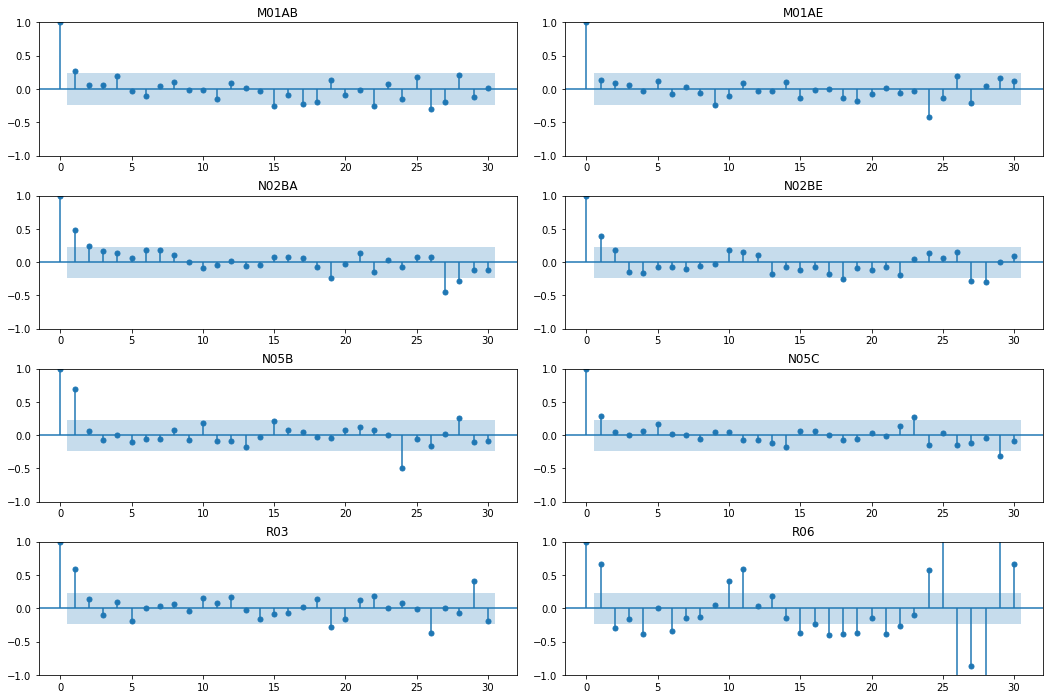

In [44]:
# plot correlogram for all the products
subplotindex=0
numrows=4
numcols=2
fig, ax = plt.subplots(numrows, numcols, figsize=(18,12))
plt.subplots_adjust(wspace=0.1, hspace=0.3)
with plt.rc_context():
    plt.rc("figure", figsize=(14,6))
    for x in ['M01AB','M01AE','N02BA','N02BE', 'N05B','N05C','R03','R06']:
        rowindex=math.floor(subplotindex/numcols)
        colindex=subplotindex-(rowindex*numcols)
        plot_pacf(df_monthly[x], lags=30, title=x, ax=ax[rowindex,colindex])
        subplotindex=subplotindex+1